**To make the assignment, first run the code below to import the right libraries.**

In [ ]:
# =================================
# Imports
# =================================
from PyCh import *
from numpy import random
from dataclasses import dataclass
from matplotlib import pyplot
import math

<h1><center> 4DC10. Intermediate assignment</center></h1>
<h2><center> Modeling and simulation of an autonomous vehicle storage and retrieval system</center></h2>
    
# 1 Subject

Today's competitive environment, in which deliveries need to be faster and order sizes become smaller, forces material handling providers to progressively develop new and better solutions. A recent development in automated material-handling technology for unit load storage and retrieval is the autonomous vehicle storage and retrieval system (AVS/RS). Figure 1 shows a representation of an AVS/RS for the handling of totes, while Figure 2 illustrates a single tier (floor, level). The storage racks are single-deep and double-sided. Each storage position is of the same size and can hold one tote. Lifts are mounted at fixed locations at one end of each storage aisle. The input/output (I/O) point is located at the first tier beside each lift. Autonomous vehicles are dedicated to a storage aisle within a specific tier (so-called tier-captive configuration). The first position on either side of the storage aisle in all tiers serves as a buffer and is used to manage the transfer of totes between vehicles and lifts (see Figure 2). One buffer (out) handles totes which have been retrieved, the other one (in), located on the other side of the storage aisle, handles the totes to be stored. The presence of these buffers allows the lift and vehicle to work independently of each other. 

The throughput performance of AVS/RS systems can be affected by design decisions (such as number of tiers, number of aisles, and depth of aisles) as well as operational decisions (such as tote storage location and order assignment).

Figure 1: AVS/RS with tier-captive configuration [1] | Figure 2: Single tier in AVS/RS [1]
- | - 
<img src="figures/avs.png" alt="drawing" width="400"/> | <img src="figures/avrs2.png" alt="drawing" width="400"/>




# 2 Goal
The goal of this assignment is to study this new material handling solution by using computer simulation. This study can be restricted to the retrieval process only, i.e., the vehicles perform only single retrieval cycles. Clearly, the retrieval phase is the most critical activity from an organisational viewpoint, as it is directly related to customer service level and &mdash; in contrast to the storage phase &mdash; it cannot be postponed to a period of low workload. 

The objectives of this assignment can be summarized as follows:
- Develop a simulation model of one aisle that consists of several tiers with retrieval process to assess the system performance in terms of throughput and flow time.
- Systematically develop the model process by process, and verify and validate each process using analytical results.
- Investigate design trade-offs, i.e., via different layouts (number of columns and tiers), for this material handling system.

# 3 Description of the AVS/RS
The AVS/RS is a fully automated system that can store and retrieve unit loads. The unit loads are placed in totes, a type of box, and these totes are placed in a designated aisle and column for storage. When retrieved, an autonomous vehicle places the totes in a buffer at the end of the aisle. There is one autonomous vehicle for every aisle within the tier. This is called the tier-captive configuration. From the buffer, the totes are picked by a lift that serves all tiers in one aisle, see Figure 2. In this assignment only one aisle that consists of $Levels$ tiers has to be modelled. Each aisle has depth number of columns of width $dv$ metres and height $dl$ metres.

Requests for a tote arrive for each tier, asking for a tote with a random (uniformly distributed) column assigned to it. The inter arrival time of requests is exponentially distributed with mean value $arrive$.

The vehicles transport totes along the aisle (one vehicle per tier). The time taken by the vehicle to process an order depends on the tote's location. The vehicle has to travel to this location, load the tote (it takes a fixed amount of time equal to $lv$ seconds), then go back to the end of the aisle and, finally, unload the tote to the buffer (again this takes $lv$ seconds). The speed profile of each vehicle is described as follows. First, the vehicle goes with a constant acceleration $av$ *m/s$^2$* until it reaches its maximum velocity $vmaxv$, then it moves with this velocity and decelerates with a constant deceleration $av$ to approach its destination point. If the tote is located too close to the end of the aisle, it is possible that the vehicle will not reach its maximum speed.

The vehicles unload the totes to a location where it is picked up by the lift. At any given time only one tote per tier is allowed to occupy such a position.

The lift transports the totes from every tier to the ground floor. The processing time depends on the tote's location and the fixed time to load and unload the tote ($ll$ seconds for loading and $ll$ seconds for unloading). The maximum speed of the lift is $vmaxl$ $m/s$ with a speed profile similar to that of the vehicles (constant acceleration/deceleration of $al$ *m/s<sup>2</sup>*).

# 4 Modeling of the AVS/RS
The model consists of several processes communicating via channels, see Figure 3.

| Figure 3: The processes in the model | 
- 
<img src="figures/avrs.png" alt="drawing" width="400"/> 

A brief description of the processes is given below:
- **G:** The generator models the arrival of orders for totes. There is one generator per tier.
- **DB:** The demand buffer stores the orders to be picked up by the vehicles. The vehicle processes the orders under first-come-first-serve policy. It can always receive a tote, but it releases a tote only when the vehicle is ready to pick it up.
- **V:** The vehicle can be modeled as a server with a variable processing time.
- **GDV:** The process consisting of a Generator, Demand Buffer and Vehicle for one tier of the AVS/RS system.
- **B:** The buffer stores the totes from the vehicles awaiting for a pick-up by the lift. The buffer operates under first-come-first-serve policy and has a finite capacity of $bc$ totes per tier. So, every tier has a buffer location of finite capacity of $bc$ totes. All those locations together form the buffer B that accommodates all the totes which are processed by the same lift. When the buffer is not empty (there is at least one tote on one of the tiers), the buffer sends information about the tier of the longest waiting tote to the lift upon request. This information is used by the lift to determine the location of the tote (the number of the tier the tote is located in). Once the lift is ready to pick it up, the tote is released to the lift. There are two types of queues in the buffer: $xs$ contains all the totes to be picked up by the lift and there are $Levels$ counters $n$ counting the totes from the corresponding tier.
- **L:** The lift, similar to the process **V**, is modeled as a machine with a variable processing time. A lift first receives a destination tier. Then the process delays for time required for the lift to go to the tote location and pick up the tote. Then it receives the tote, and next it delays for the time required to go to the ground floor and to unload the tote. After that the lift process is ready to release the tote to the Exit process.
- **E:** In the exit process all the data related to each tote are collected. This process calculates the average throughput and the average flow-time. The number of totes to be processed by the AVS/RS during one simulation run is determined by the constant $number\_of\_orders$.

# 5 Remark concerning report
The assignment must be handed in two ways: a report in PDF with the answers to each question, as well as this jupyter notebook file. The report has to contain concise answers to the questions posed. Avoid unnecessary long explanations, however answers to analytical questions without an argument will result in no points. Include all important python code in your report, but only include code of the processes you have modified (e.g. the Generator process in Exercise 6.1.b). Failing to submit both the PDF and notebook files will result in a point reduction. 

Note that some of the simulations in the last few exercises can take some time to run, so plan accordingly.

# 6 Assignment
When making a PyCh specification, one does not build an entire model and then starts debugging. A model is build step by step. During each step proper functionality is checked. We therefore model one process at a time, and connect the process with a Generator and/or Exit process to test proper functionality. In order to test proper functionality we first use analytical methods to determine the expected outcome. Then we run simulations to verify if these outcomes are indeed obtained. If that is the case, we can be more convinced that the process has been modeled correctly.

## 6.1 Exercise 1: Generator (5 points)
So the first step is to write a proper generator for a tier. To that end, the first model we build consists of (only) a Generator process and an Exit process collecting the totes generated by the Generator. The inter arrival time of requests is exponentially distributed with mean $arrive$. The requested tote should be retrieved from a random (uniformly distributed) column, where there are $depth$ columns in total (the columns ranging from 0 till 54).

a. Determine (analytically) the throughput and flow time that should result from your model with only the generator process and the exit process.

Answer: 
<center>

\begin{equation}
    \delta_G=r_a=\frac{1}{t_a}=\frac{1}{70}\approx0.0143
\end{equation}

\begin{equation}
    \phi_{G}=\gamma\frac{Q}{1-u}\frac{t_e}{m}+t_e
\end{equation}

\begin{equation}
t_e=0\rightarrow\phi_G=0
\end{equation}

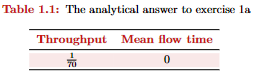
</center>

b. Complete the Generator code in the template below. Confirm that your simulations produce the correct throughput and flow time, and that the minimal and maximal column returned by your simulation are respectively 0 and 54.

<center>

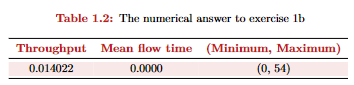

</center>

In [ ]:
# =================================
# Tote
# =================================
@dataclass
class Tote:
    entrytime: float = 0.0
    column: int = 0

# =================================
# Generator
# =================================
@process
def Generator(env, c_out, arrive, depth):
    e = lambda: random.exponential(arrive)
    u = lambda: random.randint(0,depth) 
    while True:
        x = Tote(entrytime = env.now, column = u() )
        yield env.execute(c_out.send(x))
        delay = e()
        yield env.timeout(delay)


# =================================
# Exit
# =================================
@process
def Exit(env, c_in, number_of_orders):
    mphi = 0
    for i in range(1, number_of_orders + 1):
        x = yield env.execute(c_in.receive())
        mphi = (i - 1) / i * mphi + (env.now - x.entrytime) / i

        print(f"tote = {i:6d};"  
              f"  Entrytime = {x.entrytime: 10.4f};" 
              f"  Column = {x.column:2d};"
              f"  Mean throughput =" + (f"{i / env.now:8.6f}"   if   env.now   else f"{'N.A.':>8s}") +
              f"  Mean flowtime = {mphi:6.4f}"
        )


# =================================
# Model
# =================================
def model():
    # Variables
    arrive = 70.0             # inter arrival time of requests
    depth  = 55               # the number of columns
    
    number_of_orders = 100    # the number of orders to process        

    env = Environment()
    a = Channel(env)
    G = Generator(env, a, arrive, depth)
    E = Exit(env, a, number_of_orders)
    env.run(until=E)
    print ("simulation has ended")

# =================================
# Main
# =================================
model()


## 6.2 Exercise 2: Demand Buffer (5 points)
Next, we include the Demand buffer which is modelled as a standard FIFO buffer with infinite capacity.

a. Determine (analytically) the throughput and flow time that should result from your model with only the generator process, demand buffer, and the exit process.

Answer: 
<center>

\begin{equation}
    \delta_B=r_a=\frac{1}{t_a}=\frac{1}{70}\approx0.0143
\end{equation}

\begin{equation}
    \phi_{B}=\gamma\frac{Q}{1-u}\frac{t_e}{m}+t_e
\end{equation}

$t_e=0\rightarrow\phi_B=0$
$\phi_{tot}=\phi_G+\phi_B=0$

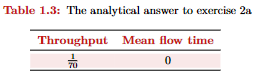

</center>


b. Complete the simulation code in the template below. Confirm that your simulations produces the same throughput and flow time as determined previously.

Note: The previously defined variables and functions remain unchanged, only the Demand Buffer is added, and the main code is changed.

Answer: 
<center>

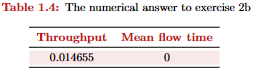
</center>

In [ ]:
# =================================
# Demand Buffer
# =================================
@process
def Demand_Buffer(env, c_in, c_out):
    xs = [] # list of totes
 
# =================================
# Our code
    while True:
        sending = c_out.send(xs[0]) if len(xs)>0 else None
        receiving = c_in.receive()
        x = yield env.select(sending, receiving)
        if selected(receiving):
            xs = xs + [x]
        if selected(sending):
            xs = xs[1:]
        # print(f"The buffer contains {len(xs)} item(s)")
# =================================

# =================================
# Model
# =================================
def model():
    # Variables
    arrive = 70.0             # inter arrival time of requests
    depth  = 55               # the number of columns
    
    number_of_orders = 10000  # the number of orders to process
    
    env = Environment()
    a = Channel(env)
    b = Channel(env)
    G = Generator(env, a, arrive, depth)
    D = Demand_Buffer(env, a, b)
    E = Exit(env, b, number_of_orders)
    env.run(until=E)
    print ("simulation has ended")
    
# =================================
# Main
# =================================
model()

## 6.3 Exercise 3: Vehicle as machine (5 points)
Next, we include the Vehicle which as a first attempt is modelled as a standard machine with a deterministic processing time of 40.0 seconds. The simulation code for the simplified vehicle is given below.

Note: The previously defined variables and functions remain unchanged, only the Vehicle is added, and the main code is changed.

In [ ]:
# =================================
# Vehicle
# =================================
@process
def Vehicle(env, c_in, c_out):
    tp = 40.0
    while True:
        x = yield env.execute(c_in.receive())
        yield env.timeout(tp)
        yield env.execute(c_out.send(x))

# =================================
# Model
# =================================
def model():
    # Variables 
    arrive = 70.0             # inter arrival time of requests
    depth  = 55               # the number of columns

    number_of_orders = 100    # the number of orders to process
    
    env = Environment()
    a = Channel(env)
    b = Channel(env)
    c = Channel(env)
    G = Generator(env, a, arrive, depth)
    D = Demand_Buffer(env, a, b)
    V = Vehicle(env, b, c)
    E = Exit(env, c, number_of_orders)
    env.run(until=E)
    print ("simulation has ended")

# =================================
# Main
# =================================
model()

a. Determine (analytically) the throughput and flow time that should result from your model with only the generator process, demand buffer, vehicle and the exit process.

Answer: 
<center>

$
\left.
\begin{array}{ll}
 t_e=40 sec\\
 \delta_V = r_a =\frac{1}{70}\\
 m=1
\end{array}
 \right\}
 u=\frac{r_at_e}{m}=\frac{4}{7}
$

$
\left.
\begin{array}{ll}
\gamma=\frac{1}{2}\left( c_a^2+c_e^2 \right)\\
c_a^2=1 \text{\quad(Exponential)}\\
c_e^2=0 \text{\quad(Deterministic)}
\end{array}
 \right\}
 \gamma=\frac{1}{2}
$

$
\left.
\begin{array}{ll}
\gamma=\frac{1}{2}\\
Q=u \text{\quad for\quad}m=1\\
\phi_V=\gamma\frac{Q}{1-u}\frac{t_e}{m}+t_e
\end{array}
 \right\}
 \phi_V=\frac{200}{3}\approx66.67
$

$\phi_{tot} = \phi_G +\phi_B+\phi_V= \frac{200}{3}$

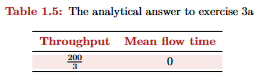
</center>

b. Run your simulation at least 10 times. Confirm that your analytically determined throughput and flow time are correct.  What is the range of outcomes for the throughput? Determine (roughly/ by trial and error) the number of orders required to get good estimates for the flow time (first three **non-zero** digits are correct).

Answer:

<center>

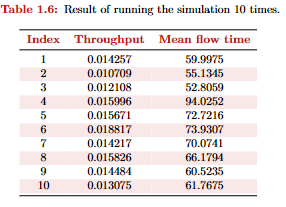
</center>


## 6.4 Exercise 4: Vehicle accurately modelled (15 points)
Assume that a vehicle starts from the buffer. If it has to go to column $i \in \{0, depth - 1\}$, it needs to drive a distance $dv \cdot (i + 1)$, pick up the tote, drive back, and deliver the tote to the buffer. For driving the required distance, the vehicle first goes with a constant acceleration $av$ $[m/s^2]$ until it reaches its maximum velocity $vmaxv$, then it moves with this velocity and decelerates with a constant deceleration $av$ to approach its destination point. If the tote is located too close to the end of the aisle, it is possible that the vehicle will not reach its maximum speed.

a. From this information, (analytically) determine the time (in seconds) it takes a vehicle to move a given distance of $x$ meters. To that end, first determine from the acceleration profile the travelled distance as function of time. From that you can determine the time required to travel a given distance. Express the time spent moving (one way) $t_{moving}$ in terms of $x$, $av$ and $vmaxv$.


Answer: ...


\begin{equation}
t_{moving}(x) =
    \begin{cases}
      2\sqrt{\frac{x}{av}} \ , & \text{for}\ x \leq \ \frac{vmaxv^2}{av} \ , \\
      \frac{vmaxv}{av} + \frac{x}{vmaxv} \ , & \text{for}\ x >    \ \frac{vmaxv^2}{av} \ .
    \end{cases}
\end{equation}



b. Next, if loading and unloading a tote both take $lv$ seconds, determine (analytically) the time it takes a vehicle, starting from the buffer, to pick up a tote from column $i \in \{0, depth - 1\}$ and deliver it to the buffer. Express the total travel time $t_{total}$ in terms of $i$, $dv$, $lv$, $av$, and $vmaxv$.


Answer: ...

\begin{equation}
t_{total}(i) =
    \begin{cases}
      4\sqrt{\frac{dv\cdot (i+1)}{av}}+2\cdot lv \ , & \text{for} \ i \leq \ \frac{vmaxv^2}{dv\cdot av}-1 \ , \\
      2\left(\frac{vmaxv}{av} + \frac{dv\cdot (i+1)}{vmaxv}\right)+2\cdot lv \ , & \text{for} \ i >    \ \frac{vmaxv^2}{dv\cdot av}-1 \ .
    \end{cases}
    \tag*{for i=0,1,...,54}
\end{equation}


c. First determine analytically the mean and variance of this total travel time $t_{total}$ for a random (uniformly distributed) column. Then, calculate the numerical mean and variance for the following parameters: $depth = 55$, $lv = 3.0$, $dv = 0.5$, $vmaxv = 1.5$, and $av = 1.0$, using the code below.


The retrieval time is denoted as T:

$\left.
\begin{array}{ll}
      p_i=P(T=t_i)=\frac{1}{55}, t=0,1,..54,\\
      E[T]=\sum_{i=0}^{54} t(i) p_i,\\
    \end{array}
    \right\}
    E[T]=\sum_{i=0}^{3} \left(4\cdot\sqrt{\frac{1}{2}\cdot(i+1)}+6\right)\cdot \frac{1}{55}+\sum_{i=4}^{54}\left( \frac{29}{3}+\frac{2}{3}i\right)\cdot \frac{1}{55}
    $

$ E[T]\approx 27.6434 $

$\left.
\begin{array}{ll}
      Var[T]=E[T^2]-\left(E[T]\right)^2,\\
      E[T]\approx 27.6434,\\
      E[T^2]\approx 876.9949
    \end{array}
    \right\}
        Var[T]\approx 112.8401
    $

INSERT THE TABLE FROM OVERLEAF

In [22]:
def exc4c():
    depth = 55
    lv = 3.0
    dv = 0.5
    vmaxv = 1.5
    av = 1.0
    
    # our code
    
    times = [];
    
    for _ in range(1000):
        
        i = random.randint(0, depth)        
        
        if i <= (vmaxv**2 / (dv*av)) - 1:
            ttotal = 4*((dv*(i+1))/av)**0.5 + 2*lv
        elif i > (vmaxv**2 / (dv*av)) - 1:
            ttotal = 2*(vmaxv/av + (dv*(i+1))/vmaxv) + 2*lv
        
        times.append(ttotal)

    
    mean = sum(times)/len(times);
    deviations = [(x - mean) ** 2 for x in times]
    variance = sum(deviations) / len(times)

    # ...

        
    print(f"the mean is {mean}")
    print(f"the variance is {variance}")

exc4c()   


the mean is 27.37821077914113
the variance is 106.95365943816974


d. Determine (analytically) the throughput and flow time that should result from your model with only the generator process, demand buffer, vehicle and the exit process.

Answer: 

<center>

$
\left.
\begin{array}{ll}
 t_e=E[T]\approx27.6434 sec\\
 r_a =\frac{1}{70}\\
 m=1
\end{array}
 \right\}
 u=\frac{r_at_e}{m}\approx0.3949
$

$
\left.
\begin{array}{ll}
\gamma=\frac{1}{2}\left( c_a^2+c_e^2 \right)\\
c_a^2=1 \text{\quad(Exponential)}\\
c_e^2=\frac{\sigma^2}{t_e^2}\approx0.1477
\end{array}
 \right\}
 \gamma\approx0.5738
$

$
\left.
\begin{array}{ll}
\gamma\approx0.5738\\
Q=u \text{\quad for\quad}m=1\\
\phi=\gamma\frac{Q}{1-u}\frac{t_e}{m}+t_e
\end{array}
 \right\}
 \phi\approx37.996
$

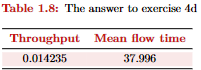

</center>

e. Complete the simulation code in the template below, incorporating the actual time a vehicle requires for picking up a tote and delivering it to the buffer. Confirm that your simulations produce the same throughput and flow time as in your calculations.

Note: the previously defined function processes remain unchanged, only the Vehicle and model need to be redefined.

<center>

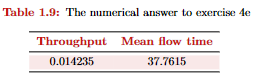
</center>

In [ ]:
# =================================
# Vehicle definition
# =================================
@process
def Vehicle(env, c_in, c_out, lv, dv, vmaxv, av):
    
    #our code
   
    while True:
        x = yield env.execute(c_in.receive())
        i = x.column

        if i <= (vmaxv**2 / (dv*av)) - 1:
            tp = 4*((dv*(i+1))/av)**0.5 + 2*lv
        elif i > (vmaxv**2 / (dv*av)) - 1:
            tp = 2*(vmaxv/av + (dv*(i+1))/vmaxv) + 2*lv

        yield env.timeout(tp)
        yield env.execute(c_out.send(x))

    #our code

# =================================
# Main
# =================================
def model():
    # Variables 
    arrive = 70.0             # inter arrival time of requests
    depth  = 55               # the number of columns
    lv = 3.0                  # time to load/unload the vehicle
    dv = 0.5                  # unit width clearance
    vmaxv = 1.5               # maximum velocity of the vehicle
    av = 1.0                  # acceleration/deceleration of the vehicle
    
    number_of_orders = 1000    # the number of orders to process
    
    env = Environment()
    a = Channel(env)
    b = Channel(env)
    c = Channel(env)
    G = Generator(env, a, arrive, depth)
    D = Demand_Buffer(env, a, b)
    V = Vehicle(env, b, c, lv, dv, vmaxv, av)
    E = Exit(env, c, number_of_orders)
    env.run(until=E)
    print ("simulation has ended")

# =================================
# Main
# =================================
model()

f.  Run your simulation at least 10 times. What is the range of outcomes for the throughput? Determine (roughly, by trial and error) the number of orders required to get good estimates for the flow time (first three **non-zero** digits are correct).

Answer: ...



## 6.5 Exercise 5: Lift as two stage machine (5 points)
In the previous exercises we focussed on modeling a tier. In exercises 5-7 we focus on modeling the Buffer and Lift, starting with the Lift. We model the Lift as a machine, which repeatedly does the following: request a destination tier, move to the desired tier, receive a tote (first delay for $ll$, then communicate), move to the ground floor, deliver the tote (first delay for $ll$, then communicate). In this exercise we assume that moving to the desired tier takes 23.0 seconds, receiving the tote takes 2.0 seconds, moving to the ground floor again takes 23.0 seconds, and delivering the tote also takes 2.0 seconds. Note that, in this case, this implies that the tote should leave the Generator and enter the Lift 25.0 seconds after the Lift has received the destination tier. All of these times are assumed to be deterministic.

a. Assume that after 1.0 second the first tote arrives at the generator. Subsequently a tote arrives respectively 10.0, 100.0, and 100.0 seconds after the previous tote has been sent to the Lift. Make a lot-time-diagram indicating how long a newly generated job spends in the Generator, and spends in the Lift. We have provided the function `draw_lot_time_diagram(locations, lots)`, which can be used to draw the lot-time-diagram. Below, lot0 has been given as an example. Use the simulation code below 6.5.b to confirm that your lot-time-diagram is correct. 

Answer: 

In [ ]:
# =================================
# Draw the lot-time-diagram
# =================================

# Set the locations
locations = ('G', 'L')

# For each lot, give the entry and exit times at respectively the generator G and lift L.
# The first lot is given as an example.
lot0 = { 'G':[  0,    26],   'L':[  26,   51] };
lot1 = { 'G':[  36,    76],   'L':[  76,   101]  };
lot2 = { 'G':[  176,    201],   'L':[  201,   226]  };
lot3 = { 'G':[  301,    326],   'L':[  326,   351] };

# Add all lots together
lots = [lot0, lot1, lot2, lot3];

# Draw the lot-time diagram
draw_lot_time_diagram(locations, lots)

b. 	Study the Lift in the simulation code below. Can you describe (in one sentence) what each of its channels, events, and entities represent?


Answer: 

	channel1 is utilized as a means of communication between the generator process and the lift process to inform the lift of the desired tier to which it should move.
	channel2 serves as the means of communication between the generator process and the lift process for the transfer of the tote from the generator to the lift.
	channel3 is employed as the means of communication between the lift process and the exit process for the transfer of the tote from the lift to the exit.

	event1 represents the action of receiving the desired tier from channel1.
	event2 represents the action of waiting for a specified amount of time, which simulates the lift's movement to the desired tier.
	event3 represents the action of receiving the tote from channel2.
	event4 represents the action of waiting for a specified amount of time, which simulates the lift's movement to the next tier.
	event5 represents the action of sending the tote to the exit via channel3.

	entity1 is the data received from channel1, specifically the desired tier.
	entity2 is the data received from channel2, specifically the tote.

In [ ]:
# =================================
# Tote definition
# =================================
@dataclass
class Tote:
    entrytime: float = 0
    tier: int = 0

# =================================
# Generator
# =================================
@process
def Generator(env, c1, c2):
    delays=[1.0, 10.0, 100.0, 100.0]
    while len(delays)>0:
        yield env.timeout(delays[0])
        delays = delays[1:]
        tier = 1
        yield env.execute(c1.send(tier))
        print(f"Generator: Informed Lift to go to tier {tier} at time {env.now:3.1f}");
        x = Tote(entrytime = env.now, tier = tier)
        yield env.execute(c2.send(x))
        print(f"Generator: Tote has completely left the Generator and entered"
              f"the Lift at time {env.now:3.1f}")
    yield env.timeout(100.0)


# =================================
# Lift
# =================================
@process
def Lift(env, channel1, channel2, channel3, ll):
    while True:
        
        event1 = channel1.receive()
        entity1 = yield env.execute(event1)
        
        event2 = env.timeout(23.0+ll)
        yield event2
        
        event3 = channel2.receive()
        entity2 = yield env.execute(event3)
        
        event4 = env.timeout(23.0+ll)
        yield event4
        
        event5 = channel3.send(entity2)
        yield env.execute(event5)
    
# =================================
# Exit 
# =================================
@process
def Exit(env, c_in):
    while True:
        x = yield env.execute(c_in.receive())
        print(f"Exit: Tote has completely left the Lift and has been received "
              f"by the Exit at time {env.now:3.1f}");

# =================================
# Model
# =================================
def model():
    # Variables
    ll = 2.0  # time to load/unload the lift
    
    env = Environment()
    a = Channel(env)
    b = Channel(env)
    c = Channel(env)
    G = Generator(env, a, b)
    L = Lift(env, a, b, c, ll)
    E = Exit(env, c)
    env.run()
    print ("simulation has ended")

# =================================
# Main
# =================================
model()

## 6.6 Exercise 6: Buffer with multiple tiers (10 points)
Every tier has a buffer location of finite capacity $bc$. In this exercise, these parallel finite buffer locations are modelled as one Buffer model.

a. Study the simulation code below. Can you describe (concisely) why the events of the buffer are modelled the way they are:

    events1 is a list of receive() events on the channels channels1[tier] for each tier. These events represent the arrival of a Tote object on the channel and are only activated if the number of Tote objects in that tier is less than the buffer capacity (bc).
    event2 is a send() event on the channel2 and represents the call for the lift. This event is activated if there are Tote objects in the buffer and lift is not called yet.
    event3 is a send() event on the channel3 and represents the sending of a Tote object to the lift. This event is activated if the lift is called and there are Tote objects in the buffer.

and can you explain what happens when an event occurs:

    If events1 is selected, the Tote object received on the channel is stored in the buffer xs and the number of Tote objects in that tier is incremented.
    If event2 is selected, the Buffer process sends the location tier the lift and sets a flag lift_called to True to indicate that the lift has been called.
    If event3 is selected, the Buffer process sends the first Tote object in the buffer xs to the lift, removes it from the buffer, and decrements the number of Tote objects in the corresponding tier. The Buffer process also sets the flag lift_called to False to indicate that the lift is no longer active.

In [ ]:
# =================================
# Generator
# =================================
@process
def Generator(env, c_out, tier):
    delays=[1.0*tier, 10.0, 100.0, 100.0]
    while len(delays)>0:
        yield env.timeout(delays[0])
        delays = delays[1:]
        x = Tote(entrytime = env.now, tier = tier)
        yield env.execute(c_out.send(x))
        print(f"Generator {tier:d}: Sending tote to Buffer completed at "
              f"time {env.now:3.1f}")
    yield env.timeout(100.0)
    
# =================================
# Buffer
# =================================


# @process
# def Buffer(env, channels1, channel2, channel3, bc, Levels):
#     xs = []
#     n = [0] * Levels
#     lift_called = False
#     while True:
#         # Define events
#         events1 = [channels1[tier].receive() if n[tier] < bc else None for tier in range(Levels)]
#         if not lift_called:
#             event3 = None
#             if len(xs) > 0:
#                 x_sending = xs[0]
#                 event2 = channel2.send(x_sending.tier)
#             else:
#                 event2 = None
#         else:
#             event2 = None
#             event3 = channel3.send(x_sending)
        
#         # Execute one of the events
#         events = events1  + [event2] + [event3]
#         yield env.select(*events)    
        
#         # Check which event is executed
#         for tier in range(Levels):
#             if selected(events1[tier]):
#                 x_received = events1[tier].entity
#                 xs = xs + [x_received]
#                 n[tier] = n[tier] + 1
            
#         if selected(event2):
#             lift_called = True
           
#         if selected(event3):
#             xs = xs[1:]
#             n[x_sending.tier] = n[x_sending.tier] - 1
#             lift_called = False
 
# =================================
# Replacement
# =================================
    
@process
def Buffer(env, channels1, channel2, channel3, bc, Levels):
    xs = []
    n = [0] * Levels
    lift_called = False
    while True:
        # Define events
        events1 = [channels1[tier].receive() if n[tier] < bc else None for tier in range(Levels)]
        if not lift_called:
            event3 = None
            if len(xs) > 0:
                x_sending = xs[0]
                event2 = channel2.send(x_sending.tier)
            else:
                event2 = None
        else:
            event2 = None
            event3 = channel3.send(x_sending)
        
        # Execute one of the events
        events = events1  + [event2] + [event3]
        yield env.select(*events)    
        
        # Check which event is executed
        for tier in range(Levels):
            if selected(events1[tier]):
                x_received = events[tier].entity
                xs = xs + [x_received]
                n[tier] = n[tier] + 1
            
        if selected(event2):
            lift_called = True
           
        if selected(event3):
            xs = xs[1:]
            n[x_sending.tier] = n[x_sending.tier] - 1
            lift_called = False    
    
    
            
# =================================
# Model
# =================================
def model():
    # Variables
    ll = 2.0  # time to load/unload the lift
    bc = 1    # buffer capacity
    Levels = 2 # the number of tiers
    
    env = Environment()
    a = [Channel(env) for tier in range(Levels)]
    b = Channel(env)
    c = Channel(env)
    d = Channel(env)
    Gs = [Generator(env, a[tier], tier) for tier in range(Levels)] 
    B = Buffer(env, a, b, c, bc, Levels)
    L = Lift(env, b, c, d, ll)
    E = Exit(env, d)
    env.run(until=10000000)
    print ("simulation has ended")

# =================================
# Main
# =================================
model()

b. Consider two tiers ($Levels = 2$), and assume that for tier $i \in \{0, Levels - 1\}$ the first tote arrives after $i$ seconds (for two tiers: after 0.0 for tier 0 and after 1.0 for tier 1). Subsequently a tote arrives respectively 10.0, 100.0, and 100.0 seconds after the completion of sending its predecessor to the buffer. Make a lot-time-diagram indicating how long a newly generated job spends in which Generator (G0 or G1), in the Buffer, and spends in the Lift. 

Answer: 

<center>

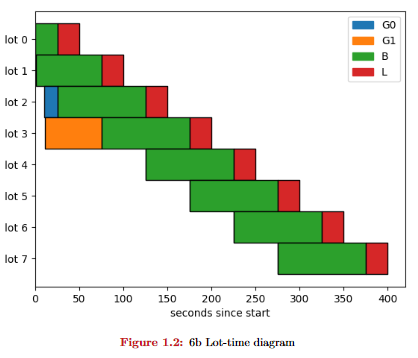
</center>

In [ ]:
# =================================
# Draw the lot-time-diagram
# =================================

# Set the locations
locations = ('G0', 'G1', 'B', 'L')

# For each lot, give the entry and exit times at generators G0 and G1, the buffer B, and lift L.
lot0 = { 'G0':[   0,     0], 'B':[0 , 25],   'L':[ 25,   50] };
lot1 = { 'G1':[   1,     1], 'B':[1 , 75],   'L':[  75 ,   100 ] };
lot2 = { 'G0':[   10,   25], 'B':[25 , 125 ],   'L':[  125 ,   150 ] };
lot3 = { 'G1':[   11,   75], 'B':[75 , 175 ],   'L':[  175,   200 ] };
lot4 = { 'G0':[   125,     125], 'B':[125 , 225 ],   'L':[  225 ,   250 ] };
lot5 = { 'G1':[   175,     175], 'B':[175 , 275 ],   'L':[  275 ,   300 ] };
lot6 = { 'G0':[   225,     225], 'B':[225 , 325 ],   'L':[  325 ,   350 ] };
lot7 = { 'G1':[   275,     275], 'B':[275 , 375 ],   'L':[  375 ,   400 ] };

# Add all lots together
lots = [lot0, lot1, lot2, lot3, lot4, lot5, lot6, lot7];

# Draw the lot-time diagram
draw_lot_time_diagram(locations, lots)

c. Suppose that we want the system to be able to handle priority orders, can you modify the Buffer model to make the lift pick up totes with higher priority first? The generator generates totes with a `tote.priority` property, for which priority 1 is high priority, and priority 2 is low priority. Only the Buffer model needs to be modified, the Tote, Generator and Exit models have already been modified. Give the model of the buffer, and the output log when you run it to show that the buffer is modelled correctly.

**Note: in the exercise 6.7 onwards, the Buffer without priorities will be used.**

In [ ]:
# =================================
# Tote definition
# =================================
@dataclass
class Tote:
    entrytime: float = 0
    tier: int = 0
    priority: int = 0
        
# =================================
# Generator
# =================================
@process
def Generator(env, c_out, tier):
    delays=[1.0*tier, 1.0, 1.0, 1.0]
    priorities=[2, tier+1, tier+1, 1]
    while len(delays)>0:
        yield env.timeout(delays[0])
        delays = delays[1:]
        priority = priorities[0]
        priorities = priorities[1:]
        x = Tote(entrytime = env.now, tier = tier, priority = priority)
        yield env.execute(c_out.send(x))
        print(f"Generator {tier:d}: Sending tote with priotity {priority} to Buffer completed at "
              f"time {env.now:3.1f}")
    yield env.timeout(100.0)
    
# =================================
# Buffer
# =================================
@process
def Buffer(env, channels1, channel2, channel3, bc, Levels):
    xs = []
    n = [0] * Levels
    lift_called = False
    while True:
        # Define events
        events1 = [channels1[tier].receive() if n[tier] < bc else None for tier in range(Levels)]
        
        if not lift_called:
            event3 = None
            
            # our code

            if len(xs) > 0: # Check whether products exist in buffer
                xs.sort(key = lambda x: x.priority) # Sorts the list based on priority
                x_sending = xs[0]
                event2 = channel2.send(x_sending.tier)
            else:
                event2 = None
            
            # our code
        else:
            
            event2 = None
            event3 = channel3.send(x_sending)
        
        # Execute one of the events
        events = events1  + [event2] + [event3]
        yield env.select(*events)    
        
        # Check which event is executed
        for tier in range(Levels):
            if selected(events1[tier]):
                x_received = events1[tier].entity
                # ...
                xs = xs + [x_received]  # Put recieved tote at the end of list
                # ...
                n[tier] = n[tier] + 1
            
        if selected(event2):
            lift_called = True
           
        if selected(event3):
            # ...
            xs = xs[1:] # Remove first tote of list
            # ...
            n[x_sending.tier] = n[x_sending.tier] - 1
            lift_called = False

# =================================
# Exit 
# =================================
@process
def Exit(env, c_in):
    while True:
        x = yield env.execute(c_in.receive())
        print(f"Exit: Tote with priority {x.priority} has completely left the Lift and has been received "
              f"by the Exit at time {env.now:3.1f}");            
            
# =================================
# Model
# =================================
def model():
    # Variables
    ll = 2.0  # time to load/unload the lift
    bc = 1    # buffer capacity
    Levels = 2 # the number of tiers
    
    env = Environment()
    a = [Channel(env) for tier in range(Levels)]
    b = Channel(env)
    c = Channel(env)
    d = Channel(env)
    Gs = [Generator(env, a[tier], tier) for tier in range(Levels)] 
    B = Buffer(env, a, b, c, bc, Levels)
    L = Lift(env, b, c, d, ll)
    E = Exit(env, d)
    env.run(until=10000000)
    print ("simulation has ended")

# =================================
# Main
# =================================
model()

## 6.7 Exercise 7: Lift accurately modelled (5 points)

Assume that the Lift starts from the ground floor. If it has to go to tier $i \in \{0, Levels - 1\}$, it needs to travel a
distance $dl \cdot (i + 1)$, pick up the tote, travel back, and deliver the tote at the ground floor. For traveling the required distance, the vehicle first goes with a constant acceleration $al$ *m/s$^2$* until it reaches its maximum velocity $vmaxl$, then it moves with this velocity and decelerates with a constant deceleration $al$ to approach its destination tier. If the tier is located too close to the ground floor, it is possible that the Lift will not reach its maximum speed. Loading and unloading a tote both take $ll$ seconds,

a. The time the lift is moving can be calculated similarly to how it was done for the vehicle in Exercise 4. Note that it takes the Lift half the time to move to pick the tote up, and then half the time to move back to drop the tote off. Using this information, determine (analytically) the time $t_{total}(i)$ it takes the Lift to pick up and drop off the item in terms of $ i $, $ dl $, $ al $, $ ll $, and $ vmaxl $.


Answer: ...

\begin{equation}
t_{total}(i) =
    \begin{cases}
      4\sqrt{\frac{dl\cdot (i+1)}{al}}+2\cdot ll \ , & \text{for} \ i \leq \ \frac{vmaxl^2}{dl\cdot al}-1 \ , \\
      2\left(\frac{vmaxl}{al} + \frac{dl\cdot (i+1)}{vmaxl}\right)+2\cdot ll \ , & \text{for} \ i >    \ \frac{vmaxl^2}{dl\cdot al}-1 \ .
    \end{cases}
    \tag*{for i=0,1,...,levels-1}
\end{equation}


b. Consider two tiers ($Levels = 2$), and assume that for tier $i \in \{0, Levels - 1\}$ the first tote arrives after $i$ seconds (for two tiers: after 0.0 for tier 0 and after 1.0 for tier 1). Subsequently a tote arrives respectively 10.0, 100.0, and 100.0 seconds after the completion of sending its predecessor to the buffer. Make a lot-time-diagram indicating how long a newly generated job spends in which Generator, in the Buffer, and spends in the Lift.

In [23]:
# =================================
# Draw the lot-time-diagram
# =================================

# Set the locations
locations = ('G0', 'G1', 'B', 'L')

#Tier 0: 
#t_one_way: 2.68
#
#Tier 1:
#t_one_way: 2.96

# For each lot, give the entry and exit times at generators G0 and G1, the buffer B, and lift L.
lot0 = { 'G0':[0, 0], 'B':[0 , 2.68], 'L':[2.68, 5.36] }
lot1 = { 'G1':[1,1], 'B':[1, 8.32], 'L':[8.32,11.28] }
lot2 = { 'G0':[10,10], 'B':[10, 13.96], 'L':[13.96, 16.64] }
lot3 = { 'G1':[11,11], 'B':[11, 19.6], 'L':[19.6, 22.56] }
lot4 = { 'G0':[110, 110], 'B':[110,112.68], 'L':[112.68, 115.36] }
lot5 = { 'G1':[111, 111], 'B':[111,118.31], 'L':[118.32, 121.28] }
lot6 = { 'G0':[210, 210], 'B':[210,212.68], 'L':[212.68, 215.36] }
lot7 = { 'G1':[211, 211], 'B':[211, 218.32], 'L':[218.32, 221.28] }


# Add all lots together
lots = [lot0, lot1, lot2, lot3, lot4, lot5, lot6, lot7];

# Draw the lot-time diagram
draw_lot_time_diagram(locations, lots)

<IPython.core.display.Javascript object>

c. Complete the Lift in the simulation code in the template below, and confirm that your simulations produce the correct results, i.e., in correspondence with your lot-time-diagram.

In [24]:
# =================================
# Tote definition
# =================================
@dataclass
class Tote:
	entrytime: float = 0
	tier: int = 0

 

@process
def Generator(env, c_out, tier):
	delays=[1.0*tier, 10.0, 100.0, 100.0]
	while len(delays)>0:
		yield env.timeout(delays[0])
		delays = delays[1:]
		x = Tote(entrytime = env.now, tier = tier)
		yield env.execute(c_out.send(x))
		print(f"Generator {tier:d}: Sending tote to Buffer completed at "
			  f"time {env.now:3.1f}")
	yield env.timeout(100.0)

 

@process
def Exit(env, c_in):
	while True:
		x = yield env.execute(c_in.receive())
		print(f"Exit: Tote has completely left the Lift and has been received "
				 f"by the Exit at time {env.now:3.1f}");
		
		
# =================================
# Lift
# =================================
@process
def Lift(env, channel1, channel2, channel3, ll, dl, vmaxl, al):
	while True:
		
		event1 = channel1.receive()
		entity1 = yield env.execute(event1)
		
		if entity1 <= (vmaxl**2 / (dl*al)) - 1:
			t_total = 4*((dl*(entity1+1))/al)**0.5 + 2*ll
		elif entity1 > (vmaxl**2 / (dl*al)) - 1:
			t_total = 2*(vmaxl/al + (dl*(entity1+1))/vmaxl) + 2*ll
		
		event2 = env.timeout(t_total/2)
		yield event2
		
		event3 = channel2.receive()
		entity2 = yield env.execute(event3)
		
		event4 = env.timeout(t_total/2)
		yield event4
		
		event5 = channel3.send(entity2)
		yield env.execute(event5)

# =================================
# Buffer
# =================================
@process
def Buffer(env, channels1, channel2, channel3, bc, Levels):
	xs = []
	n = [0] * Levels
	lift_called = False
	while True:
		# Define events
		events1 = [channels1[tier].receive() if n[tier] < bc else None for tier in range(Levels)]
		if not lift_called:
			event3 = None
			if len(xs) > 0:
				x_sending = xs[0]
				event2 = channel2.send(x_sending.tier)
			else:
				event2 = None
		else:
			event2 = None
			event3 = channel3.send(x_sending)
		
		# Execute one of the events
		events = events1  + [event2] + [event3]
		yield env.select(*events)    
		
		# Check which event is executed
		for tier in range(Levels):
			if selected(events1[tier]):
				x_received = events1[tier].entity
				xs = xs + [x_received]
				n[tier] = n[tier] + 1
			
		if selected(event2):
			lift_called = True
		   
		if selected(event3):
			xs = xs[1:]
			n[x_sending.tier] = n[x_sending.tier] - 1
			lift_called = False
		
# =================================
# Model
# =================================
def model():
	# Variables
	ll = 2.0        # time to load/unload the lift
	bc = 1          # buffer capacity
	Levels = 2      # the number of tiers
	dl = 0.8        # unit height clearance
	vmaxl = 5.0     # maximum velocity of lift
	al = 7.0        # acceleration/deceleration of lift
	
	env = Environment()
	a = [Channel(env) for tier in range(Levels)] # a channel for each tier, each sending totes
	b = Channel(env)  # for sending totes
	c = Channel(env)  # for calling the lift
	d = Channel(env)  # for sending totes
	Gs = [Generator(env, a[tier], tier) for tier in range(Levels)] 
	B = Buffer(env, a, b, c, bc, Levels)
	L = Lift(env, b, c, d, ll, dl, vmaxl, al)
	E = Exit(env, d)
	env.run()
	print ("simulation has ended")

	
# =================================
# Main
# =================================
model()

Generator 0: Sending tote to Buffer completed at time 0.0
Generator 1: Sending tote to Buffer completed at time 1.0
Exit: Tote has completely left the Lift and has been received by the Exit at time 5.4
Generator 0: Sending tote to Buffer completed at time 10.0
Generator 1: Sending tote to Buffer completed at time 11.0
Exit: Tote has completely left the Lift and has been received by the Exit at time 11.3
Exit: Tote has completely left the Lift and has been received by the Exit at time 16.6
Exit: Tote has completely left the Lift and has been received by the Exit at time 22.5
Generator 0: Sending tote to Buffer completed at time 110.0
Generator 1: Sending tote to Buffer completed at time 111.0
Exit: Tote has completely left the Lift and has been received by the Exit at time 115.4
Exit: Tote has completely left the Lift and has been received by the Exit at time 121.3
Generator 0: Sending tote to Buffer completed at time 210.0
Generator 1: Sending tote to Buffer completed at time 211.0
Exi

## 6.8 Exercise 8: Entire system (10 points)
In the previous exercises we developed and tested each process individually. Now it is time to combine all processes into one model.

a. Determine the (total) arrival rate of orders for a system with $Levels$ tiers, where for each tier orders arrive with a mean inter arrival time of $arrive$.

Answer:
\begin{equation}
    \lambda=\frac{\text{\textit{Levels}}}{\text{\textit{arrive}}}
\end{equation}



b. Complete the simulation code in the template below by substituting the code for the processes as you derived in Exercises 1, 2, 4, 6, and 7. Note that the type tote has been extended in comparison with Exercise 1, so extra code is required in the Generator process to include the tier. Verify if the throughput in your simulations matches with the start rate you determined. Verify that totes reach the exit from each tier. Also verify that totes are generated from each column. 

If you were not able to complete the Vehicle and Lift models, you can use the simplified models from respectively Exercises 3 and 5, with a total processing time $t_{vehicle, total} = 10 + \frac{depth}{3}$ for the vehicle, and a total processing time $t_{lift, total} = 5 + \frac{Level}{5}$. You can do the same for the following exercises.

Answer: ...



In [ ]:
# =================================
# Tote
# =================================
@dataclass
class Tote:
	entrytime: float = 0.0
	column: int = 0
	tier: int  = 0
		
		
# =================================
# Generator from Exercise 1 (modified to include tier) 
# =================================
@process
def Generator(env, c_out, arrive, depth, tier):
	e = lambda: random.exponential(arrive)
	u = lambda: random.randint(0,depth) 
	while True:
		x = Tote(entrytime = env.now, column = u(), tier = tier)
		yield env.execute(c_out.send(x))
		delay = e()
		yield env.timeout(delay)

		
# =================================
# Demand Buffer from Exercise 2
# =================================
@process
def Demand_Buffer(env, c_in, c_out):
	xs = [] # list of totes
	while True:
		sending = c_out.send(xs[0]) if len(xs)>0 else None
		receiving = c_in.receive()
		x = yield env.select(sending, receiving)
		if selected(receiving):
			xs = xs + [x]
		if selected(sending):
			xs = xs[1:]

	
# =================================
# Vehicle from Exercise 4
# =================================
@process
def Vehicle(env, c_in, c_out, lv, dv, vmaxv, av):
	while True:
		x = yield env.execute(c_in.receive())
		i = x.column

		if i <= (vmaxv**2 / (dv*av)) - 1:
			tp = 4*((dv*(i+1))/av)**0.5 + 2*lv
		elif i > (vmaxv**2 / (dv*av)) - 1:
			tp = 2*(vmaxv/av + (dv*(i+1))/vmaxv) + 2*lv

		yield env.timeout(tp)
		yield env.execute(c_out.send(x))

	
# =================================
# Lift from Exercise 7
# =================================
@process
def Lift(env, channel1, channel2, channel3, ll, dl, vmaxl, al):
	while True:
		
		event1 = channel1.receive()
		entity1 = yield env.execute(event1)
		
		if entity1 <= (vmaxl**2 / (dl*al)) - 1:
			t_total = 4*((dl*(entity1+1))/al)**0.5 + 2*ll
		elif entity1 > (vmaxl**2 / (dl*al)) - 1:
			t_total = 2*(vmaxl/al + (dl*(entity1+1))/vmaxl) + 2*ll
		
		event2 = env.timeout(t_total/2)
		yield event2
		
		event3 = channel2.receive()
		entity2 = yield env.execute(event3)
		
		event4 = env.timeout(t_total/2)
		yield event4
		
		event5 = channel3.send(entity2)
		yield env.execute(event5)

	
# =================================
# Buffer from Exercise 6a
# =================================
@process
def Buffer(env, channels1, channel2, channel3, bc, Levels):
	xs = []
	n = [0] * Levels
	while True:
		events1 = [channels1[tier].receive() if n[tier] < bc else None for tier in range(Levels)]
		event2 = channel2.send(xs[0].tier) if len(xs) > 0 else None
		event3 = channel3.send(xs[0]) if len(xs) > 0 else None
		events = events1 + [event2] + [event3]

		yield env.select(*events)
		
		for tier in range(Levels):
			if selected(events1[tier]):
				x = events1[tier].entity
				xs = xs + [x]
				n[tier] = n[tier] + 1
		
		if selected(event2):
			pass
			
		if selected(event3):
			tier = xs[0].tier 
			xs = xs[1:]
			n[tier] = n[tier] - 1
	  
	
# =================================
# Exit
# =================================
@process
def Exit(env, c_in, number_of_orders):
	mphi = 0.0
	for i in range(1, number_of_orders + 1):
		x = yield env.execute(c_in.receive())
		mphi = (i - 1) / i * mphi + (env.now - x.entrytime) / i
		mthi = i/env.now
	return mphi, mthi 


		
# =================================
# GDV Submodel (Generator + DemandBuffer  + Vehicle)
# =================================
def GDV(env, c_out, arrive, depth, tier, lv, dv, vmaxv, av):
	a = Channel(env)
	b = Channel(env)
	G = Generator(env, a, arrive, depth, tier)
	D = Demand_Buffer(env, a, b)
	V = Vehicle(env, b, c_out, lv, dv, vmaxv, av)

	
# =================================
# Model
# =================================
def model(Levels, depth, arrive, bc, number_of_orders):
	# Variables
	lv = 3.0                   # time to load/unload the vehicle
	dv = 0.5                   # unit width clearance
	vmaxv = 1.5                # maximum velocity of the vehicle
	av = 1.0                   # acceleration/deceleration of the vehicle
	ll = 2.0                   # time to load/unload the lift
	dl = 0.8                   # unit height clearance
	vmaxl = 5.0                # maximum velocity of lift
	al = 7.0                   # acceleration/deceleration of lift
	
	env = Environment()
	c = [Channel(env) for tier in range(Levels)] 
	d = Channel(env)  
	e = Channel(env)  
	f = Channel(env)  
	GDVs = [ GDV(env, c[tier], arrive, depth, tier, lv, dv, vmaxv, av)  for tier in range(Levels) ] 
	B = Buffer(env, c, d, e, bc, Levels)
	L = Lift(env, d, e, f, ll, dl, vmaxl, al)
	E = Exit(env, f, number_of_orders)
	env.run(until=E)
	mph, mth = E.value
	return mph, mth


# =================================
# Experiment
# =================================
def experiment():
	Levels = 9                # the number of tiers
	depth  = 55               # the number of columns
	arrive = 70.0             # inter arrival time of requests
	number_of_orders = 10000  # the number of orders to process 
	bc = 1                    # buffer capacity
	
	# print(f"--- Experiment {e}: For Levels={Levels}, depth={depth}, arrive={arrive}, bc={bc}, number_of_orders={number_of_orders} --- ")
	mph, mth = model(Levels, depth, arrive, bc, number_of_orders)
	print(f"--- Experiment {e}: Mean throughput = {mth:8.6f}; Mean flowtime = {mph:6.4f} ---")
	
	#Added code
	return mth, mph

# =================================
# Main
# =================================

experiment()


c. Run your simulation 30 times, and record for each run the resulting average throughput and average flow time.
Determine the mean and the standard deviation of both the average throughput and the average flow time for these 30 simulations. Finally, determine a 95% confidence interval for both the average throughput and the average flow time.

Answer: 

<center>

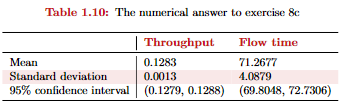
</center>



In [ ]:
def mean_stddev_column(data, column_index):
		column = [row[column_index] for row in data]
		n = len(column)
		mean = sum(column) / n
		stddev = (sum((x - mean) ** 2 for x in column) / n) ** 0.5
		confidence_interval = 1.96 * stddev / math.sqrt(n)
		return mean, stddev,(mean - confidence_interval, mean + confidence_interval)

def experiment():
	Levels = 9                # the number of tiers
	depth  = 55               # the number of columns
	arrive = 70.0             # inter arrival time of requests
	number_of_orders = 10000  # the number of orders to process 
	bc = 1                    # buffer capacity
	n=2

	Data = []
	for i in range(0,30):
		mph, mth = model(Levels, depth, arrive, bc, number_of_orders)
		print(f"--- Experiment {i}: Mean throughput = {mth:8.6f}; Mean flowtime = {mph:6.4f} ---")
		Data.append([mth, mph])

	throughput = mean_stddev_column(Data, 0)
	flowtime = mean_stddev_column(Data, 1)
	print(Data)
	print(f"Throughput:\n	mean: {throughput[0]:3.4f}, standard deviation: {throughput[1]:3.4f}, 95%: {throughput[2]}\n"
			f"Flowtime:\n	mean: {flowtime[0]:3.4f}, standard deviation: {flowtime[1]:3.4f}, 95%: {flowtime[2]}")
		

experiment()

## 6.9 Exercise 9: Effect of buffer capacity (10 points)
Via computer simulation analyze the impact of the buffer capacity on the throughput and flow time (choose values of $bc$ as 1,2,3,200). For each setting, run your simulations 30 times and determine both mean and standard deviation of the resulting average throughput and average flow time for these 30 simulations, as well as 95% confidence intervals.

In [ ]:
def mean_stddev_column(data, column_index):
		column = [row[column_index] for row in data]
		n = len(column)
		mean = sum(column) / n
		stddev = (sum((x - mean) ** 2 for x in column) / n) ** 0.5
		confidence_interval = 1.96 * stddev / math.sqrt(n)
		return mean, stddev,(mean - confidence_interval, mean + confidence_interval)

def experiment():
	Levels = 9                # the number of tiers
	depth  = 55               # the number of columns
	arrive = 70.0             # inter arrival time of requests
	number_of_orders = 10000  # the number of orders to process 
	bc = 200                    # buffer capacity

	Data = []
	for i in range(0,30):
		mph, mth = model(Levels, depth, arrive, bc, number_of_orders)
		print(f"--- Experiment {i}: Mean throughput = {mth:8.6f}; Mean flowtime = {mph:6.4f} ---")
		Data.append([mth, mph])

	throughput = mean_stddev_column(Data, 0)
	flowtime = mean_stddev_column(Data, 1)
	print(Data)
	print(f"Throughput:\n	mean: {throughput[0]:3.4f}, standard deviation: {throughput[1]:3.4f}, 95%: {throughput[2]}\n"
			f"Flowtime:\n	mean: {flowtime[0]:3.4f}, standard deviation: {flowtime[1]:3.4f}, 95%: {flowtime[2]}")

experiment()

Answer:
<center>

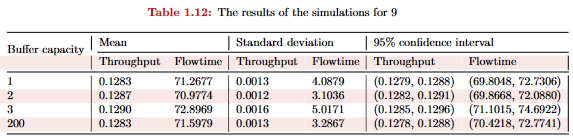
</center>



## 6.10 Exercise 10: Looking for the best layout (30 points)
Via computer simulation consider 6 different scenarios (see the table below) that correspond to different layouts of the
storage facility with a total capacity of 500 totes with different number of tiers and columns.

| Scenario | 1 | 2 | 3 | 4| 5 | 6 |
| - | - | - | - | - | - | - |
| Levels |  2 | 5 | 10 | 20 | 25 | 50 |
| Depth | 250 | 100 | 50 | 25 | 20 | 10 |

In order to obtain an answer to the questions below: for each scenario, run your simulations 30 times and determine both mean and standard deviation of the resulting average throughput and average flow time for these 30 simulations, as well as 95% confidence intervals.

a. How can we adjust the model to determine the maximal throughput? For each scenario, determine by means of simulation the maximal throughput. What do you notice about the flowtime?

NOTE FROM COEN: MAXIMUM THROUGHPUT HAS TO BE ADDED!

In [ ]:
# =================================
# Tote
# =================================
@dataclass
class Tote:
	entrytime: float = 0.0
	column: int = 0
	tier: int  = 0
		
		
# =================================
# Generator from Exercise 1 (modified to include tier) 
# =================================
@process
def Generator(env, c_out, arrive, depth, tier):
	e = lambda: random.exponential(arrive)
	u = lambda: random.randint(0,depth) 
	while True:
		x = Tote(entrytime = env.now, column = u(), tier = tier)
		yield env.execute(c_out.send(x))
		delay = e()
		yield env.timeout(delay)

		
# =================================
# Demand Buffer from Exercise 2
# =================================
@process
def Demand_Buffer(env, c_in, c_out):
	xs = [] # list of totes
	while True:
		sending = c_out.send(xs[0]) if len(xs)>0 else None
		receiving = c_in.receive()
		x = yield env.select(sending, receiving)
		if selected(receiving):
			xs = xs + [x]
		if selected(sending):
			xs = xs[1:]

	
# =================================
# Vehicle from Exercise 4
# =================================
@process
def Vehicle(env, c_in, c_out, lv, dv, vmaxv, av):
	while True:
		x = yield env.execute(c_in.receive())
		i = x.column

		if i <= (vmaxv**2 / (dv*av)) - 1:
			tp = 4*((dv*(i+1))/av)**0.5 + 2*lv
		elif i > (vmaxv**2 / (dv*av)) - 1:
			tp = 2*(vmaxv/av + (dv*(i+1))/vmaxv) + 2*lv

		yield env.timeout(tp)
		yield env.execute(c_out.send(x))

	
# =================================
# Lift from Exercise 7
# =================================
@process
def Lift(env, channel1, channel2, channel3, ll, dl, vmaxl, al):
	while True:
		
		event1 = channel1.receive()
		entity1 = yield env.execute(event1)
		
		if entity1 <= (vmaxl**2 / (dl*al)) - 1:
			t_total = 4*((dl*(entity1+1))/al)**0.5 + 2*ll
		elif entity1 > (vmaxl**2 / (dl*al)) - 1:
			t_total = 2*(vmaxl/al + (dl*(entity1+1))/vmaxl) + 2*ll
		
		event2 = env.timeout(t_total/2)
		yield event2
		
		event3 = channel2.receive()
		entity2 = yield env.execute(event3)
		
		event4 = env.timeout(t_total/2)
		yield event4
		
		event5 = channel3.send(entity2)
		yield env.execute(event5)

	
# =================================
# Buffer from Exercise 6a
# =================================
@process
def Buffer(env, channels1, channel2, channel3, bc, Levels):
	xs = []
	n = [0] * Levels
	while True:
		events1 = [channels1[tier].receive() if n[tier] < bc else None for tier in range(Levels)]
		event2 = channel2.send(xs[0].tier) if len(xs) > 0 else None
		event3 = channel3.send(xs[0]) if len(xs) > 0 else None
		events = events1 + [event2] + [event3]

		yield env.select(*events)
		
		for tier in range(Levels):
			if selected(events1[tier]):
				x = events1[tier].entity
				xs = xs + [x]
				n[tier] = n[tier] + 1
		
		if selected(event2):
			pass
			
		if selected(event3):
			tier = xs[0].tier 
			xs = xs[1:]
			n[tier] = n[tier] - 1
	  
	
# =================================
# Exit
# =================================
@process
def Exit(env, c_in, number_of_orders):
	mphi = 0.0
	for i in range(1, number_of_orders + 1):
		x = yield env.execute(c_in.receive())
		mphi = (i - 1) / i * mphi + (env.now - x.entrytime) / i
		mthi = i/env.now
	return mphi, mthi 


		
# =================================
# GDV Submodel (Generator + DemandBuffer  + Vehicle)
# =================================
def GDV(env, c_out, arrive, depth, tier, lv, dv, vmaxv, av):
	a = Channel(env)
	b = Channel(env)
	G = Generator(env, a, arrive, depth, tier)
	D = Demand_Buffer(env, a, b)
	V = Vehicle(env, b, c_out, lv, dv, vmaxv, av)
	
# =================================
# Model
# =================================
def model(Levels, depth, arrive, bc, number_of_orders):
	# Variables
	lv = 3.0                   # time to load/unload the vehicle
	dv = 0.5                   # unit width clearance
	vmaxv = 1.5                # maximum velocity of the vehicle
	av = 1.0                   # acceleration/deceleration of the vehicle
	ll = 2.0                   # time to load/unload the lift
	dl = 0.8                   # unit height clearance
	vmaxl = 5.0                # maximum velocity of lift
	al = 7.0                   # acceleration/deceleration of lift
	
	env = Environment()
	c = [Channel(env) for tier in range(Levels)] 
	d = Channel(env)  
	e = Channel(env)  
	f = Channel(env)  
	GDVs = [ GDV(env, c[tier], arrive, depth, tier, lv, dv, vmaxv, av)  for tier in range(Levels) ] 
	B = Buffer(env, c, d, e, bc, Levels)
	L = Lift(env, d, e, f, ll, dl, vmaxl, al)
	E = Exit(env, f, number_of_orders)
	env.run(until=E)
	mph, mth = E.value
	return mph, mth

# =================================
# Main
# =================================


def mean_stddev_column(data, column_index):
		column = [row[column_index] for row in data]
		n = len(column)
		mean = sum(column) / n
		stddev = (sum((x - mean) ** 2 for x in column) / n) ** 0.5
		confidence_interval = 1.96 * stddev / math.sqrt(n)
		return mean, stddev,(mean - confidence_interval, mean + confidence_interval)

def experiment():
	scenarios = [[2, 250], [5, 100], [10, 50], [20, 25], [25, 20], [50, 10]]
	for i in range(0, len(scenarios)):
		Levels = scenarios[i][0]   # the number of tiers
		depth  = scenarios[i][1]   # the number of columns
		arrive = 70.0             # inter arrival time of requests
		number_of_orders = 10000  # the number of orders to process 
		bc = 200                    # buffer capacity

		Data = []
		for i in range(0,30):
			mph, mth = model(Levels, depth, arrive, bc, number_of_orders)
			# print(f"--- Experiment {i}: Mean throughput = {mth:8.6f}; Mean flowtime = {mph:6.4f} ---")
			Data.append([mth, mph])

		throughput = mean_stddev_column(Data, 0)
		flowtime = mean_stddev_column(Data, 1)
		# print(Data)
		print(f"---<| Data from Scenario {i} |>---")
		print(f"Throughput:\n	mean: {throughput[0]:3.4f}, standard deviation: {throughput[1]:3.4f}, 95%: {throughput[2]}\n"
				f"Flowtime:\n	mean: {flowtime[0]:3.4f}, standard deviation: {flowtime[1]:3.4f}, 95%: {flowtime[2]}")

experiment()

Answer: ...



b. Assume a required throughput of 6 totes per minute. Which of the given scenarios are feasible? Modify your model, and compare the resulting flow time for each feasible scenario.

Answer: ...



c. Based on your outcomes, select a layout that seems the best for you. If necessary, introduce other performance indicators and modify the code accordingly. The report on this step should contain an argument to select the best layout.

Answer: ...



## References
[1] G. Marchet, M. Melanci, S. Perotti and E. Tappia, "Analytical model to estimate performance of autonomous vehicle storage and retrieval systems for product totes", International Journal of Production Research, vol. 50(24), 7134-7148, 2012.